NIM : 221351084 <br>
nama : Muhamad Abdulah Ridwan<br>
kelas : Pagi C

# import library

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import CategoricalNB




# load dataset

In [2]:
# load dataset 
df =pd.read_csv("Pegawai.csv")

In [3]:
df.head(10)

,ID Pegawai,Lama Bekerja (tahun),Jumlah Proyek Selesai,Tingkat Pendidikan,Pelatihan Terbaru (tahun),Jam Kerja per Minggu,Penilaian Kepemimpinan,Keahlian Teknis (0-10),Kehadiran (%),Departemen,Status Kepegawaian,Tingkat Stres,Performa
0,1,8,17,S2,0,44,1,5,91,IT,Tetap,Tinggi,Tinggi
1,2,12,9,S1,1,33,4,10,78,IT,Tetap,Rendah,Sedang
2,3,9,15,SMA,0,45,6,1,83,Marketing,Kontrak,Tinggi,Sedang
3,4,1,13,S2,2,44,8,5,89,Marketing,Magang,Sedang,Rendah
4,5,3,28,SMA,1,31,7,5,90,Finance,Magang,Rendah,Sedang
5,6,12,12,S1,3,46,7,4,83,IT,Magang,Tinggi,Tinggi
6,7,5,27,SMA,3,31,4,7,95,Finance,Kontrak,Sedang,Sedang
7,8,14,17,S2,4,30,4,9,99,Finance,Tetap,Sedang,Rendah
8,9,12,23,SMA,3,41,6,3,95,IT,Tetap,Rendah,Rendah
9,10,10,9,S2,1,49,7,4,85,Marketing,Magang,Tinggi,Tinggi


# exploratory data analysis

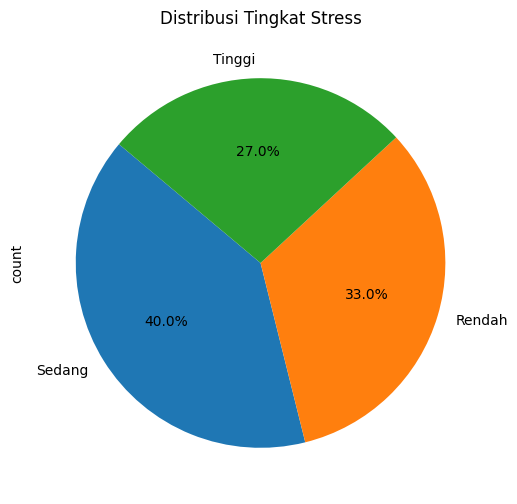

In [4]:
# eda varian 1
plt.figure(figsize=(8, 6))
df['Tingkat Stres'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, color=['blue', 'orange'])
plt.title("Distribusi Tingkat Stress")
plt.show()

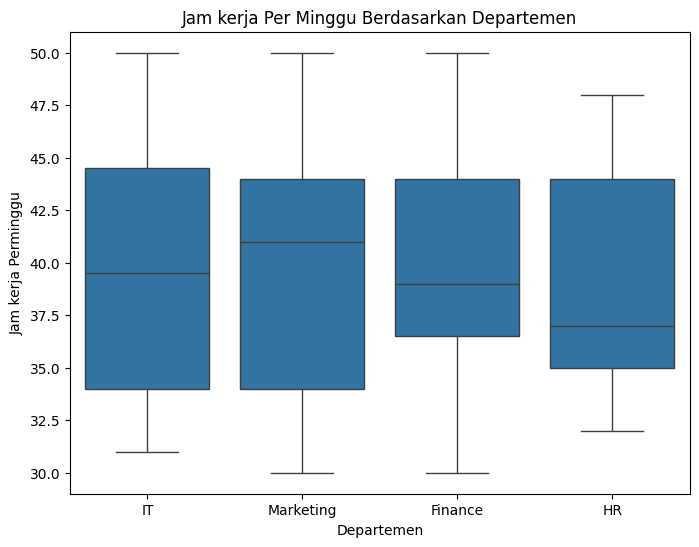

In [5]:
# eda varian 2
plt.figure(figsize=(8, 6))
sns.boxplot(x='Departemen', y='Jam Kerja per Minggu', data=df)
plt.title("Jam kerja Per Minggu Berdasarkan Departemen")
plt.xlabel("Departemen")
plt.ylabel("Jam kerja Perminggu")
plt.xticks(ticks=[0, 1, 2, 3], labels=['IT', 'Marketing', 'Finance', 'HR'])
plt.show()


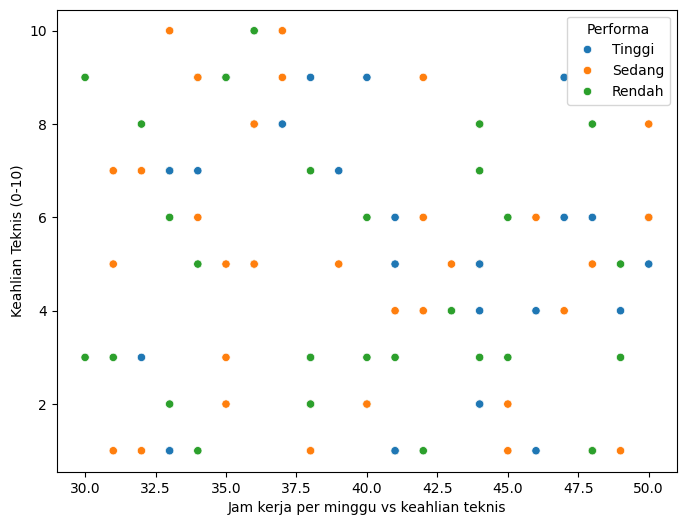

In [6]:
# eda varian 3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Jam Kerja per Minggu', y='Keahlian Teknis (0-10)', hue='Performa', data=df)
plt.xlabel("Jam kerja per minggu vs keahlian teknis")
plt.ylabel("Keahlian Teknis (0-10)")
plt.legend(title="Performa")
plt.show()

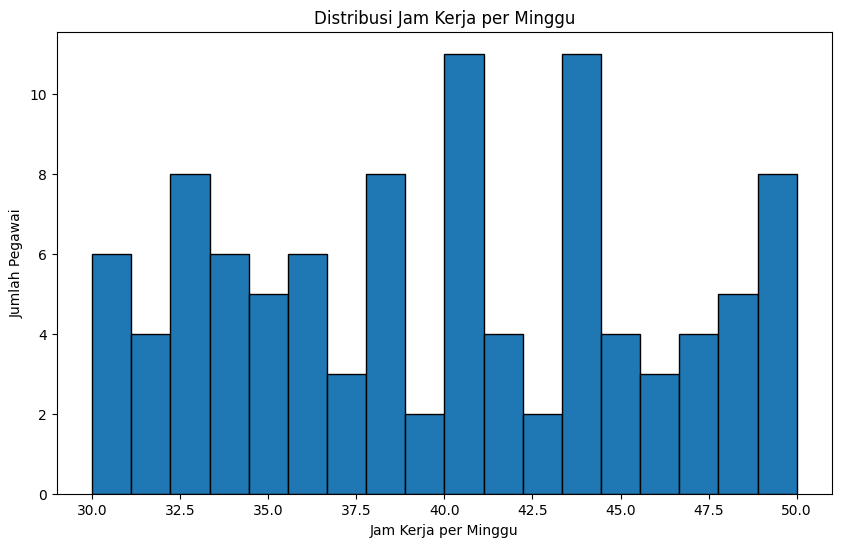

In [7]:
# eda varian 4
plt.figure(figsize=(10, 6))
plt.hist(df['Jam Kerja per Minggu'], bins=18, edgecolor='black')
plt.title("Distribusi Jam Kerja per Minggu")
plt.xlabel("Jam Kerja per Minggu")
plt.ylabel("Jumlah Pegawai")
plt.show()

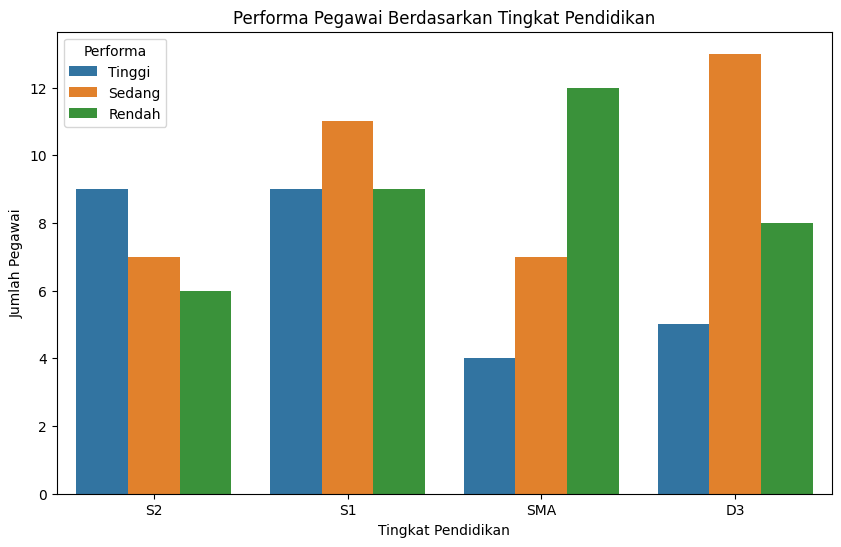

In [8]:
# eda varian 5
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tingkat Pendidikan', hue='Performa')
plt.title("Performa Pegawai Berdasarkan Tingkat Pendidikan")
plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Jumlah Pegawai")
plt.show()

# data preprocessing

In [9]:
# di sini dilakukan preprocessing data sesuai kebutuhan algoritma
df_encoded = pd.DataFrame(df)

In [10]:
label_encoder_PenilaianKepemimpinan = LabelEncoder()
label_encoder_KeahlianTeknis = LabelEncoder()
label_encoder_Kehadiran = LabelEncoder()
label_encoder_Departemen = LabelEncoder()
label_encoder_TingkatStres = LabelEncoder()

In [11]:
df_encoded.head(15)

,ID Pegawai,Lama Bekerja (tahun),Jumlah Proyek Selesai,Tingkat Pendidikan,Pelatihan Terbaru (tahun),Jam Kerja per Minggu,Penilaian Kepemimpinan,Keahlian Teknis (0-10),Kehadiran (%),Departemen,Status Kepegawaian,Tingkat Stres,Performa
0,1,8,17,S2,0,44,1,5,91,IT,Tetap,Tinggi,Tinggi
1,2,12,9,S1,1,33,4,10,78,IT,Tetap,Rendah,Sedang
2,3,9,15,SMA,0,45,6,1,83,Marketing,Kontrak,Tinggi,Sedang
3,4,1,13,S2,2,44,8,5,89,Marketing,Magang,Sedang,Rendah
4,5,3,28,SMA,1,31,7,5,90,Finance,Magang,Rendah,Sedang
5,6,12,12,S1,3,46,7,4,83,IT,Magang,Tinggi,Tinggi
6,7,5,27,SMA,3,31,4,7,95,Finance,Kontrak,Sedang,Sedang
7,8,14,17,S2,4,30,4,9,99,Finance,Tetap,Sedang,Rendah
8,9,12,23,SMA,3,41,6,3,95,IT,Tetap,Rendah,Rendah
9,10,10,9,S2,1,49,7,4,85,Marketing,Magang,Tinggi,Tinggi


In [12]:
Categorical_df_encoded.copy()
Categorical_df['Penilaian Kepemimpinan'] = pd.cut(Categorical_df['Penilaian Kepemimpinan'], bins=[0, 2, 4, 6, 8], labels=[0, 1, 2, 3])
Categorical_df['Keahlian Teknis (0-10)'] = pd.cut(Categorical_df['Keahlian Teknis (0-10)'], bins=[0, 2, 4, 6, 8, 10], labels=[0, 1, 2, 3, 4])
Categorical_df['Kehadiran (%)'] = pd.cut(Categorical_df['Kehadiran (%)'], bins=[0, 20, 40, 60, 80, 100], labels=[0, 1, 2, 3, 4])


NameError: name 'Categorical_df_encoded' is not defined

# modeling

In [ ]:
# buatkan model sesuai arahan soal


NameError: name 'X' is not defined

NameError: name 'x_train' is not defined

NameError: name 'X_test_' is not defined

NameError: name 'y_test' is not defined

# simulasi

In [ ]:
# simulasikan model dengan inputan baru


# evaluasi

In [ ]:
# menampilkan akurasi / confusion matrix
